In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualizationdf_e.shapef
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df_n = pd.read_csv('../data/processed/cleaned_data_Namrata_NAN.csv')
df_e = pd.read_csv('../data/processed/cleaned_data_Emanuela.csv')



In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [5]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

In [6]:
X = df_e[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type']]

In [7]:
X.shape

(21517, 26)

In [8]:
X.isna().sum()

sq_mt_built                  126
n_rooms                        0
n_bathrooms                   16
is_exact_address_hidden        0
floor                       2594
is_floor_under              1163
rent_price                     0
buy_price_by_area              0
is_renewal_needed              0
is_new_development           976
has_central_heating         8082
has_individual_heating      8082
has_ac                         0
has_fitted_wardrobes           0
has_lift                    2368
is_exterior                 3018
energy_certificate             0
has_parking                    0
is_orientation_north       10294
is_orientation_west        10294
is_orientation_south       10294
is_orientation_east        10294
built_year                 11634
neighbourhood                  0
district                       0
house_type                     0
dtype: int64

In [9]:
X.dropna(
    inplace = True,
)

In [10]:
# Automatically identify numerical and categorical features
# Select numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])


K =  2 	WCSS Err. =  101328.05407164531
K =  3 	WCSS Err. =  94350.17210821633
K =  4 	WCSS Err. =  90353.5347686433
K =  5 	WCSS Err. =  87132.33410171521
K =  6 	WCSS Err. =  83175.15263781919
K =  7 	WCSS Err. =  81322.26349309672
K =  8 	WCSS Err. =  78923.40799479172
K =  9 	WCSS Err. =  77542.16966011061
K =  10 	WCSS Err. =  75662.23448928089


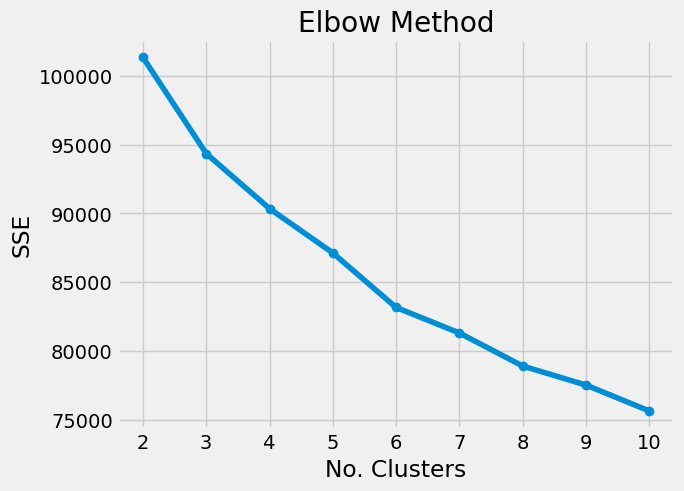

In [11]:

# Create and fit the KMeans model with preprocessing
def fit_kmeans(n_clusters, X):
    kmeans_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=9, verbose=0))
    ])
    kmeans_pipeline.fit(X)
    return kmeans_pipeline.named_steps["cluster"].inertia_

# Compute WCSS for different numbers of clusters
cluster_errors = []

for n_clusters in range(2, 11):
    wcsse = fit_kmeans(n_clusters,X)
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

# Plot the SSE for different numbers of clusters
plt.plot(range(2, 11), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


For n_clusters = 2, The average silhouette_score is : 0.1253
For n_clusters = 3, The average silhouette_score is : 0.0944
For n_clusters = 4, The average silhouette_score is : 0.1003
For n_clusters = 5, The average silhouette_score is : 0.1044
For n_clusters = 6, The average silhouette_score is : 0.0988
For n_clusters = 7, The average silhouette_score is : 0.0853
For n_clusters = 8, The average silhouette_score is : 0.0872
For n_clusters = 9, The average silhouette_score is : 0.076
For n_clusters = 10, The average silhouette_score is : 0.0775


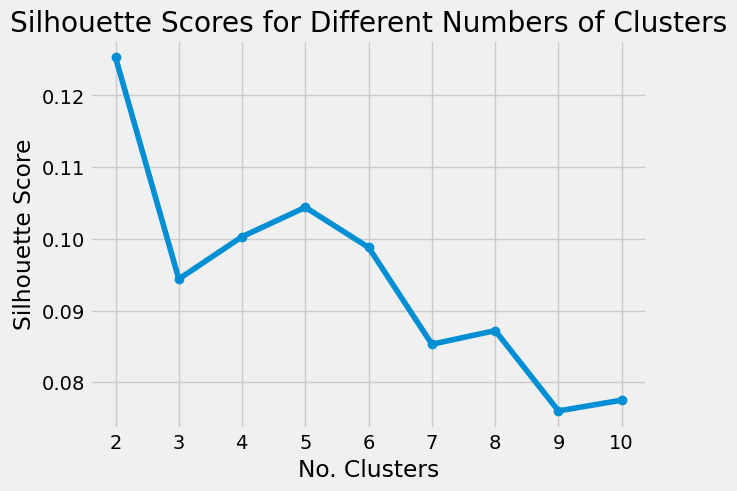

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score


silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=9, verbose=0))
    ])

    # Fit the pipeline and get the cluster labels
    cluster_labels = kmeans_pipeline.fit_predict(X)
    
    # Get the preprocessed data
    X_tr = kmeans_pipeline.named_steps["preprocessor"].transform(X)
    
    silhouette_avg = silhouette_score(X_tr, cluster_labels).round(4)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")
    
    silhouette_s.append(silhouette_avg)

# Plot the Silhouette Scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.show()

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>


### It looks like there are 2 / 3 / 4 Clusters, based on the requirement

In [13]:

numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])


# Fit the pipeline
pipeline.fit(X)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'built_year'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['floor', 'energy_certificate', 'neighbourhood', 'district',
       'house_type'],
      dtype='object'))])),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

### Clustering - 1: Houses with respect to age of houses clustered according to renewal status
#### Interesting for Casavo to know which houses in which locations are how old and need ho investment for renovation

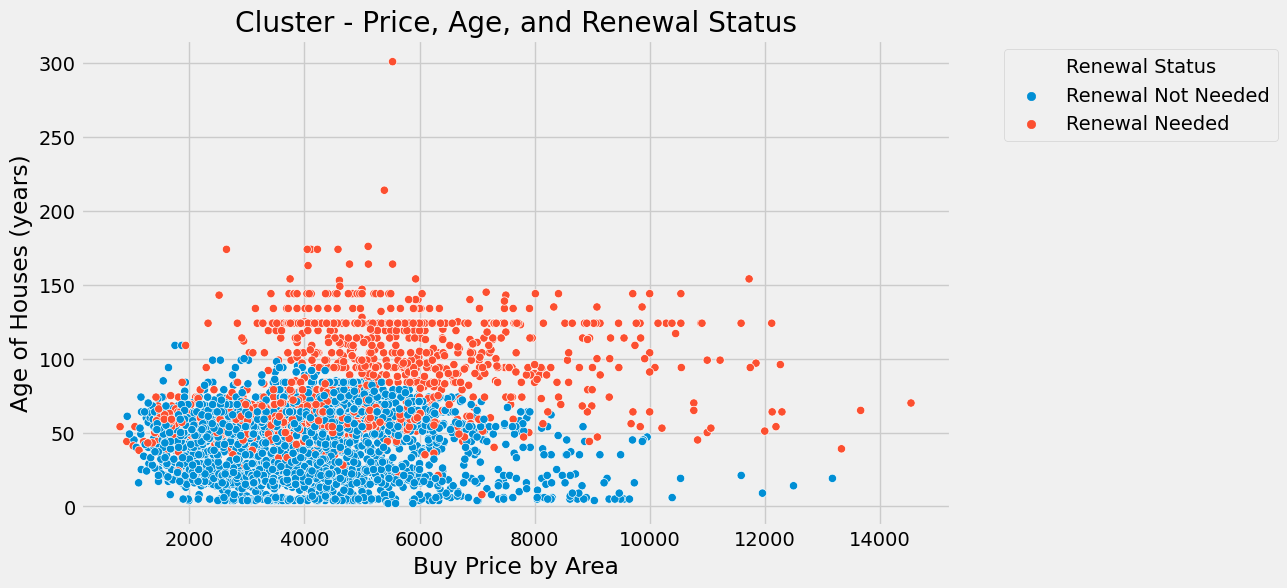

In [14]:
current_year = 2024
X['age'] = current_year - X['built_year']

X_ren = X[['is_renewal_needed','buy_price_by_area','age']]

numeric_cols = X_ren.select_dtypes(include=[np.number]).columns
categorical_cols = X_ren.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_ren)

X_ren['renew_cluster_label'] = pipeline.named_steps['kmeans'].labels_

# Map cluster labels to meaningful names
cluster_labels = {0: 'Renewal Not Needed', 1: 'Renewal Needed'}
X_ren['renew_cluster_label'] = X_ren['renew_cluster_label'].map(cluster_labels)

# Create a scatter plot with customized legend labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='buy_price_by_area', y='age', hue='renew_cluster_label', data=X_ren)
plt.title('Cluster - Price, Age, and Renewal Status')
plt.xlabel('Buy Price by Area')
plt.ylabel('Age of Houses (years)')
plt.legend(title='Renewal Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

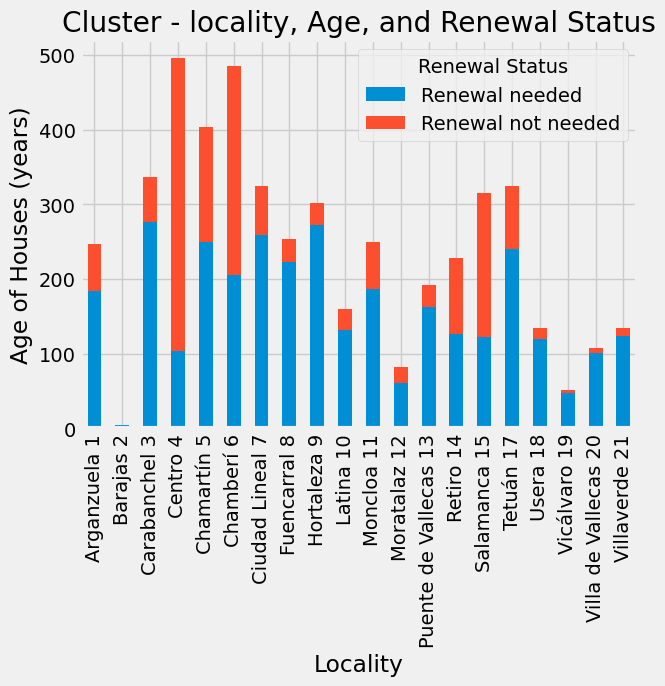

In [15]:
X_loc_ren = X[['is_renewal_needed','buy_price_by_area','district','age']]

numeric_cols = X_loc_ren.select_dtypes(include=[np.number]).columns
categorical_cols = X_loc_ren.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_loc_ren)

X_loc_ren['renew_locality_cluster'] = pipeline.named_steps['kmeans'].labels_

# Map cluster labels to meaningful names
cluster_labels_loc = {0: 'Renewal needed', 1: 'Renewal not needed'}
X_loc_ren['renew_locality_cluster'] = X_loc_ren['renew_locality_cluster'].map(cluster_labels_loc)

stacked_loc = X_loc_ren.groupby(['district', 'renew_locality_cluster']).size().unstack().fillna(0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
stacked_loc.plot(kind='bar', stacked=True)

plt.title('Cluster - locality, Age, and Renewal Status')
plt.xlabel('Locality')
plt.xticks(rotation = 90)
plt.ylabel('Age of Houses (years)')
plt.legend(title='Renewal Status')
plt.show()

### Clustering - 2: Houses with respect to Price, age of houses clustered according to the size of house
#### Interesting for Casavo to segregate houses according to size, age and price
#### Observations: 
##### - Older houses (Cluster 2) tend to be bigger as well as expensive
##### - Newer houses (Cluster 1) tend to be smaller as well as cheaper



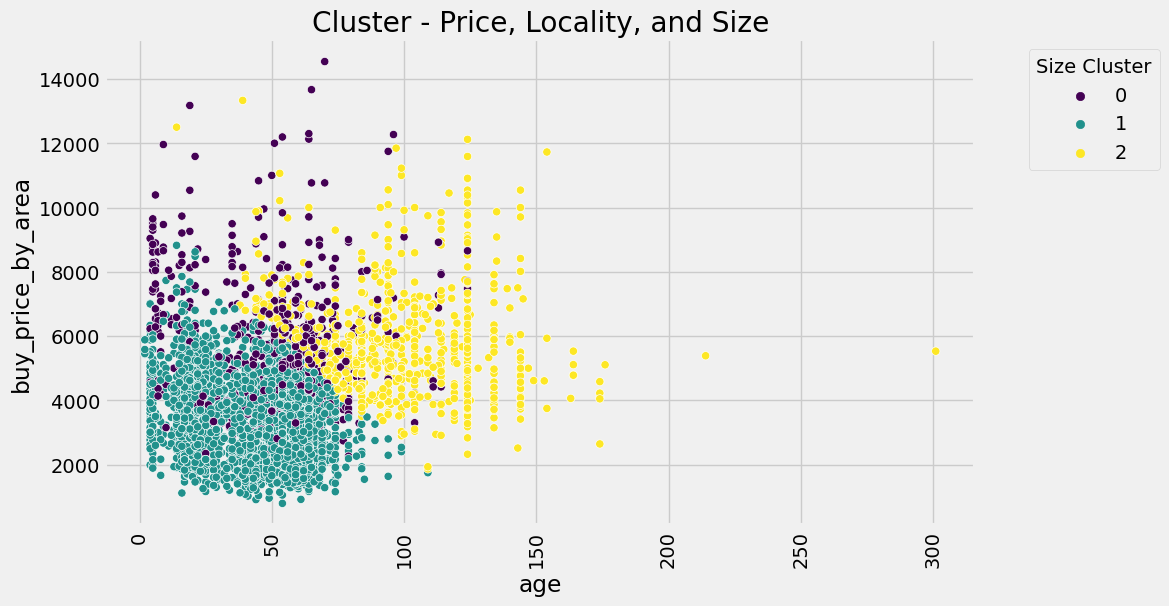

In [24]:
X_size_loc = X[['district','buy_price_by_area','age','sq_mt_built']]

numeric_cols = X_size_loc.select_dtypes(include=[np.number]).columns
categorical_cols = X_size_loc.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])


# Fit the pipeline
pipeline.fit(X_size_loc)

X_size_loc['size_cluster'] = pipeline.named_steps['kmeans'].labels_

# Map cluster labels to meaningful names
#cluster_labels = {0: 'Renewal Not Needed', 1: 'Renewal Needed'}
#X_size_loc['size_cluster'] = X_size_loc['size_cluster'].map(cluster_labels)

# Create a scatter plot with customized legend labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='buy_price_by_area',
                hue = 'size_cluster', data=X_size_loc, palette = 'viridis')
plt.title('Cluster - Price, Locality, and Size')
plt.xticks(rotation=90)

#plt.xlabel('Buy Price by Area')
#plt.ylabel('Age of Houses (years)')
plt.legend(title='Size Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
X['house_type'].value_counts()

house_type
Apartment    4252
Penthouse     304
Duplex        187
Studio         87
Name: count, dtype: int64

### Clustering - 3: Houses with respect to Price, Locality clustered according to the house type
#### Interesting for Casavo:
##### - Apartments and duplex are found allover the city. 
##### - Penthouse and studios are the most expensive 

<Figure size 1000x600 with 0 Axes>

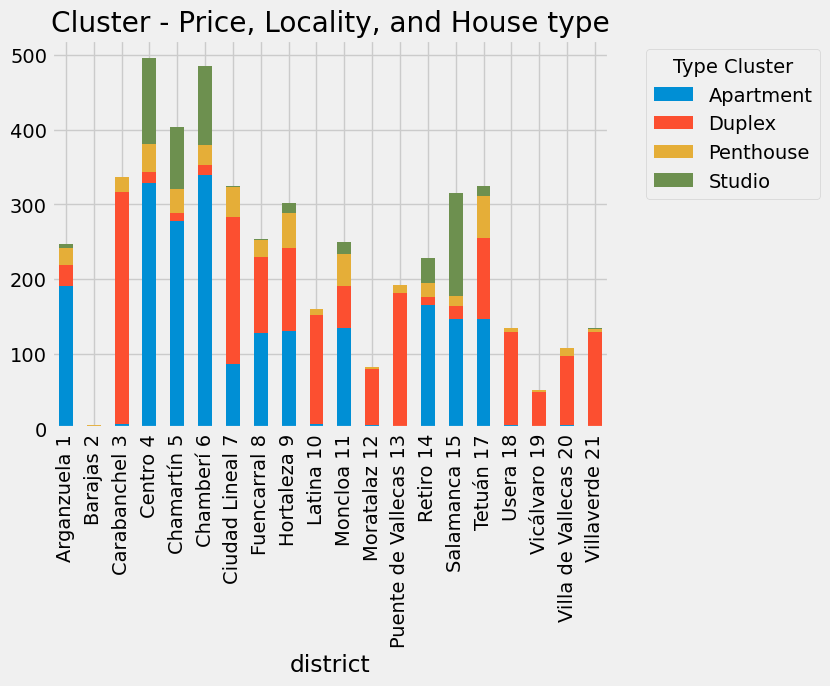

In [23]:
X_type = X[['district','buy_price_by_area','house_type']]

numeric_cols = X_type.select_dtypes(include=[np.number]).columns
categorical_cols = X_type.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])


# Fit the pipeline
pipeline.fit(X_type)

X_type['type_cluster'] = pipeline.named_steps['kmeans'].labels_

# Determine the most common house type in each cluster
cluster_house_types = X_type.groupby('type_cluster')['house_type'].agg(lambda x: x.value_counts().index[0])

cluster_house = {0: 'Penthouse', 1: 'Studio',2: 'Duplex', 3: 'Apartment'}


# Map the cluster labels to the most common house type
X_type['type_cluster_label'] = X_type['type_cluster'].map(cluster_house)


stacked_data_type = X_type.groupby(['district', 'type_cluster_label']).size().unstack().fillna(0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
stacked_data_type.plot(kind='bar', stacked=True)
plt.title('Cluster - Price, Locality, and House type')
plt.xticks(rotation=90)

#plt.xlabel('Buy Price by Area')
#plt.ylabel('Age of Houses (years)')
plt.legend(title='Type Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

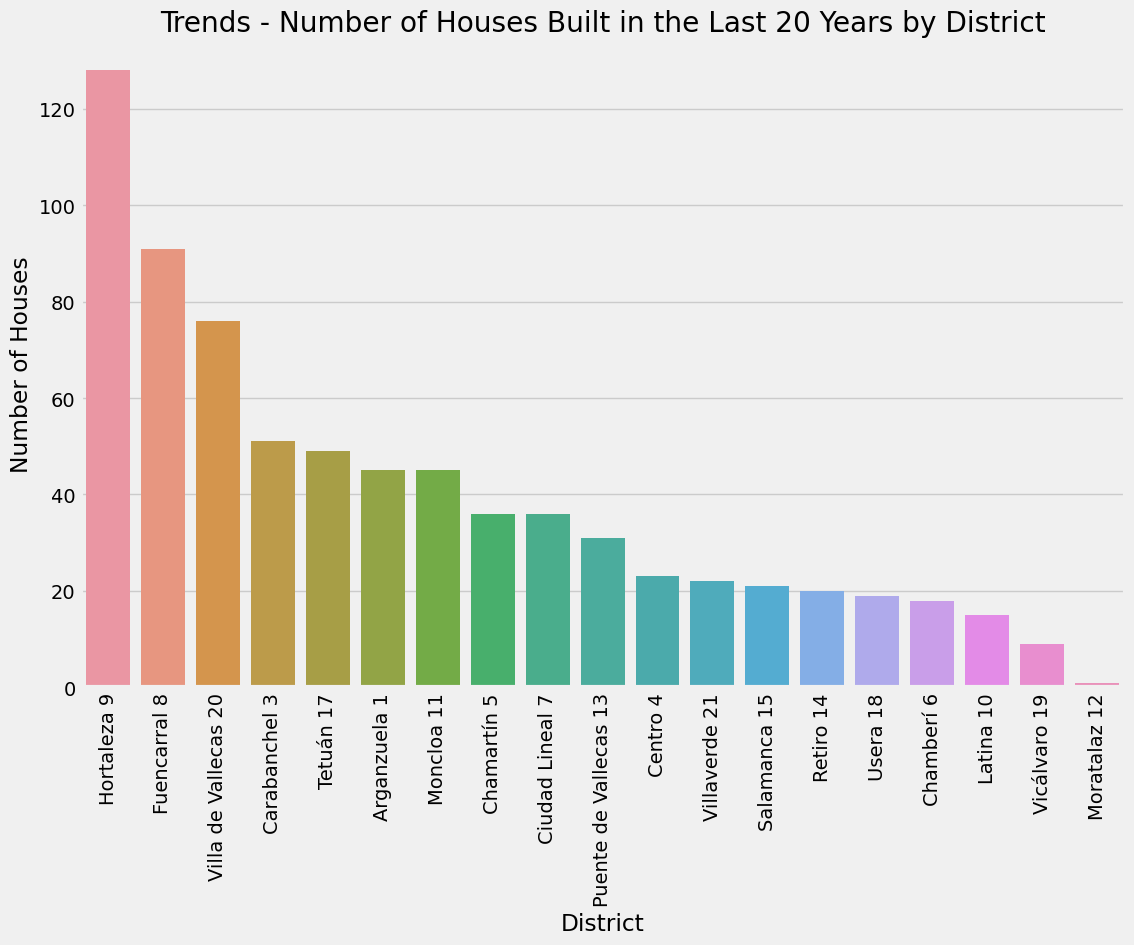

In [22]:

# Select relevant features for clustering based on locality and age
X_loc_age = X[['district', 'age']]

numeric_cols = X_loc_age.select_dtypes(include=[np.number]).columns
categorical_cols = X_loc_age.select_dtypes(include=['object', 'category']).columns

# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_loc_age)

# Add cluster labels to the DataFrame
X_loc_age['locality_age_cluster'] = pipeline.named_steps['kmeans'].labels_

# Show trends of houses built in recent years
recent_years = X_loc_age[X_loc_age['age'] <= 20]  # Houses built in the last 10 years
plt.figure(figsize=(12, 8))
sns.countplot(x='district', data=recent_years, order=recent_years['district'].value_counts().index)
plt.title('Trends - Number of Houses Built in the Last 20 Years by District')
plt.xlabel('District')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)
plt.show()
